Project Description:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model.

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!


In [1]:
# importing required initial libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("wine quality.Pred.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
df.shape

(1599, 12)

In [5]:
# There are 1599 rows and 12 columns in this data set
# Quality is my target Variable

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
df.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1307,6.8,0.68,0.09,3.9,0.068,15.0,29.0,0.99524,3.41,0.52,11.1,4
703,7.5,0.38,0.48,2.6,0.073,22.0,84.0,0.99720,3.32,0.70,9.6,4
80,6.2,0.45,0.20,1.6,0.069,3.0,15.0,0.99580,3.41,0.56,9.2,5


In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
# Checking df information

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
# Checking Data Types

df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [153]:
# Observations: Datatypes are correct for all columns. Eventhough "quality" is categorical in nature, data type is "int64" as the values in the column are integers, hence it is fine.

# Target Column Update

In [154]:
#As per the problem statement, we need to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and he remainder as 'not good/0'.

#Hence updating the target column "quality" accordingly

# New target column is "wine_quality"




In [13]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [14]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [15]:
# Setting the arbitrary cutoff for wine quality

df["wine_quality"]=[1 if i>=7 else 0 for i in df["quality"]]

In [16]:
# updated target column

df["wine_quality"]

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: wine_quality, Length: 1599, dtype: int64

In [17]:
df["wine_quality"].unique()

array([0, 1])

In [18]:
df["wine_quality"].value_counts()

0    1382
1     217
Name: wine_quality, dtype: int64

In [155]:
# Observation:

# Both the classes are imbalanced.We will treat it in a short while.

In [19]:
df.dtypes["wine_quality"]

dtype('int64')

# Null Values Check

In [20]:
 # Checking the sum of null values for all columns
    
df.isnull(). sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_quality            0
dtype: int64

In [156]:
# Observations: Null values are zero in all columns

In [21]:
# checking the total sum of null values for entire dataset

df.isnull().sum().sum() 

0

In [157]:
# Observations: Null values are zero in the entire dataset

In [22]:
# Dropping original target column "quality"

df.drop("quality",axis=1,inplace=True)  
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [23]:
df.shape

(1599, 12)

In [24]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_quality'],
      dtype='object')

# Statistical Summary

In [25]:
# statistical summary for discrete/continuous data

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [158]:
# Observation
# 1) This data set has no null values
# 2) I feel the data set has skewness
# 3) std deviation is high for 'total sulfur dioxide', 'free sulfur dioxide' that means the data spread is high
# 4) Large difference between 75th percentile and max for 'fixed acidity', 'residual sugar', 'free sulfur dioxide', total sulfur dioxide",hence outliers are present



# Skeweness Check

In [35]:
# Checking the skewness and sorting them in descending order

df.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
wine_quality            2.129363
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

In [159]:
# Observations:

# 1) Max skeweness - "chlorides"
# 2) Min skeweness - "density"
# 3) Columns with high skewness: "chlorides","residual sugar","sulphates","total sulfur dioxide","free sulfur dioxide"
# 4) No need to check skewness on target variable "wine_quality" as we don't remove skewness on target variable.
# 5) Current skeweness range is: [-5.6 to +5.6] In general, we accept skewness range of -0.5 to +0.5, however this is # not fixed hence different methods will be applied to remove skewness and will select the one with least skewness # #range.

# Visulaziation of the Data

In [160]:
# Checking the distribution of continuous data

In [27]:
import seaborn as sns

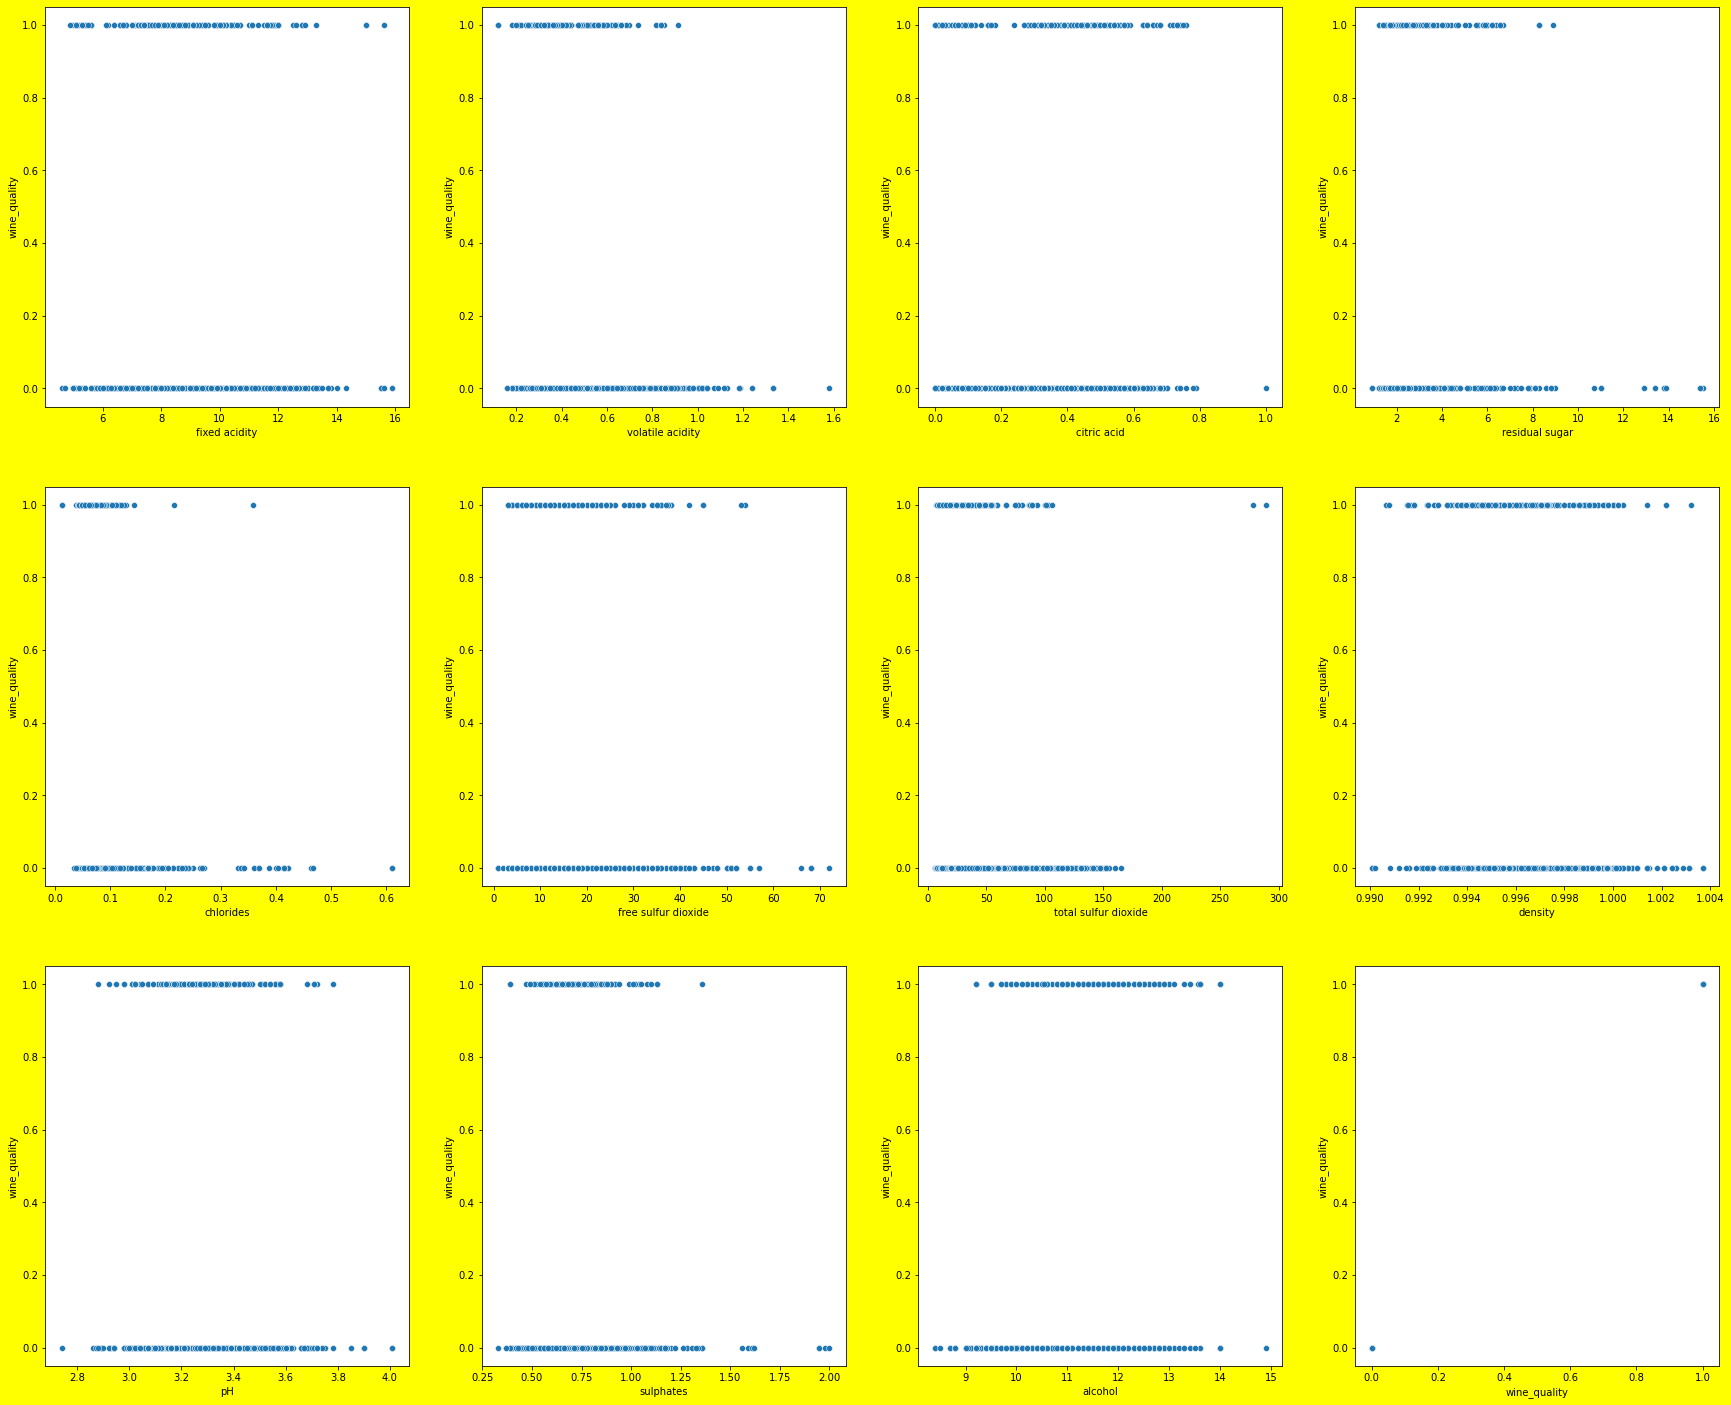

In [55]:
plt.figure(figsize=(30,25),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.scatterplot(x=column,y="wine_quality",data=df)
    plotnumber=plotnumber+1

plt.show()

In [56]:
# Data does not look normally distributed. We will gather more proofs


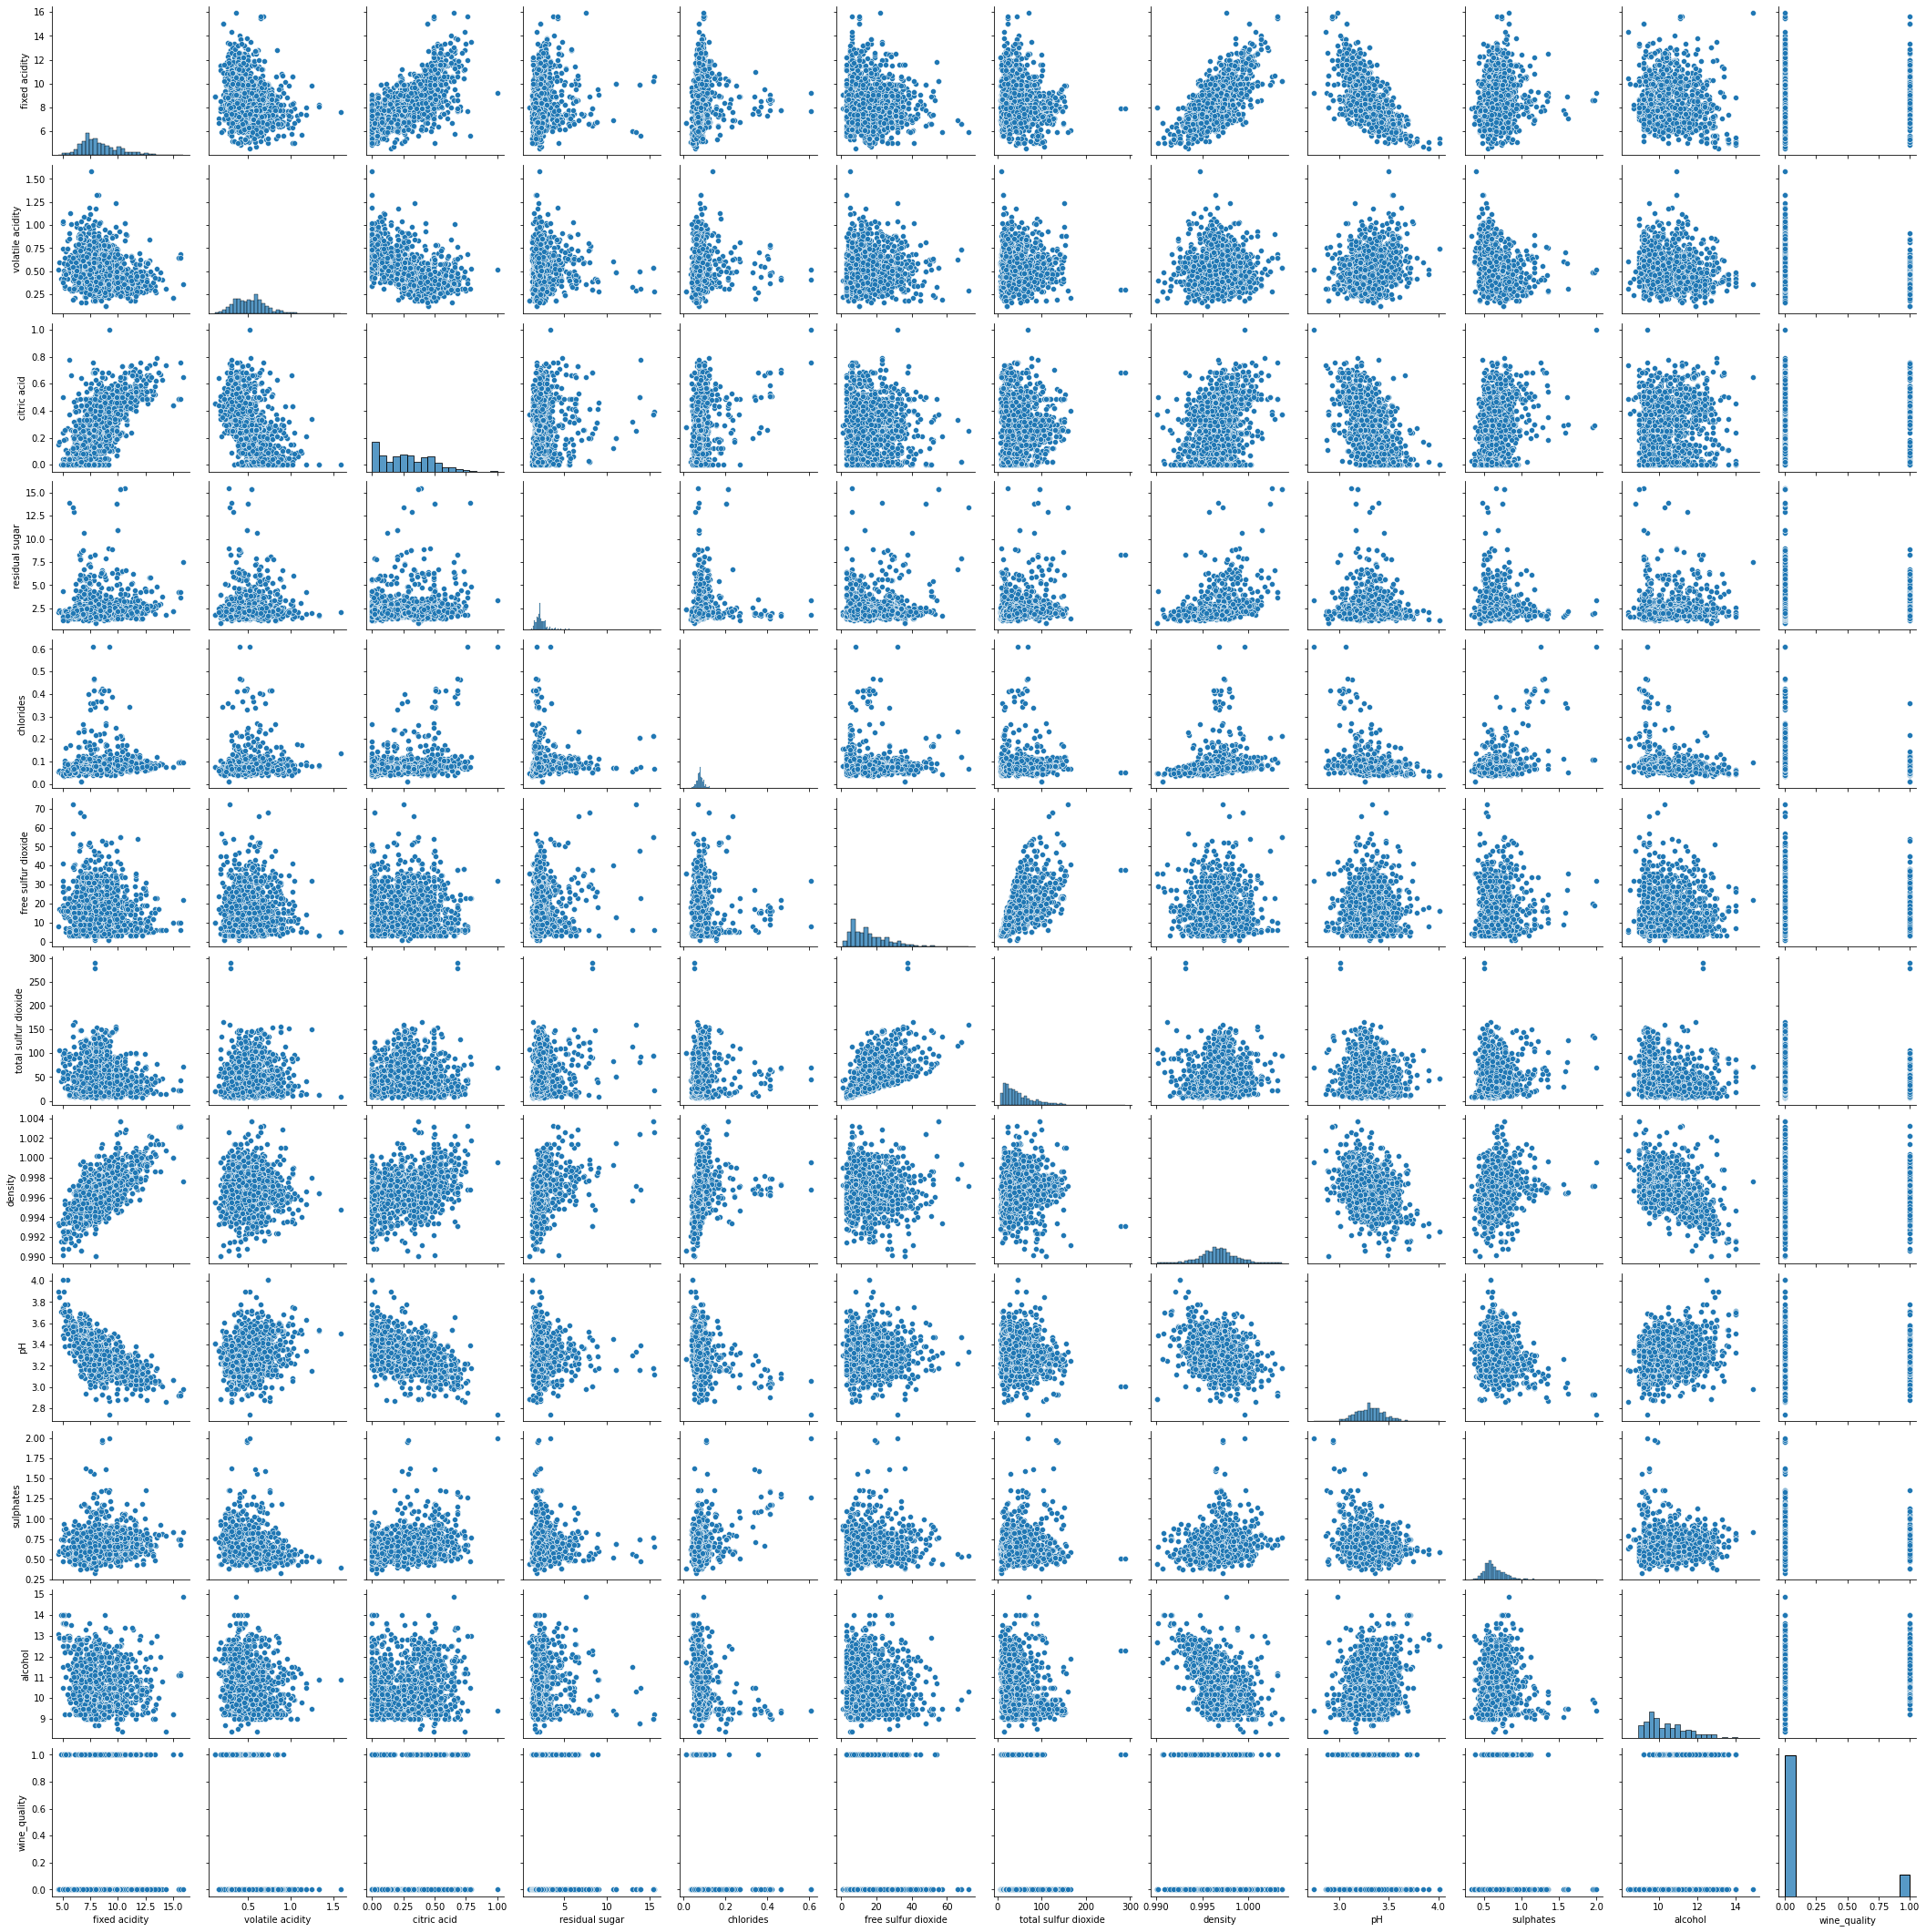

In [57]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

In [58]:
# Now below checking for the bell shaped curve

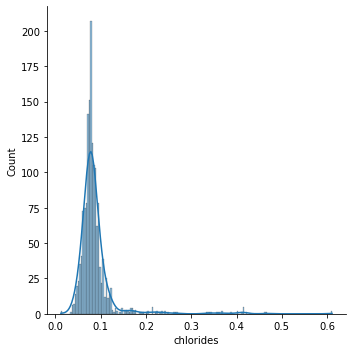

In [28]:
sns.displot(data=df,kde=True,x="chlorides")
plt.show()

In [161]:
# The data of the column is not normalized. There is skewness present

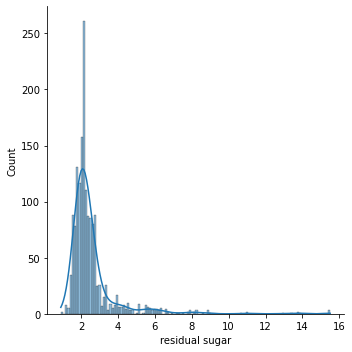

In [31]:
sns.displot(data=df,kde=True,x="residual sugar")
plt.show()

In [162]:
#The data of the column is not normalized. There is skewness present

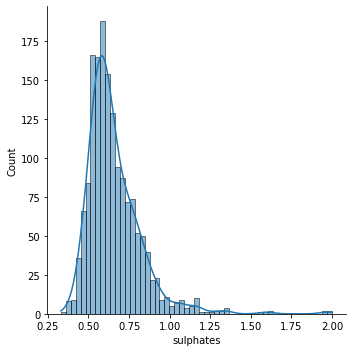

In [32]:
sns.displot(data=df,kde=True,x="sulphates")
plt.show()

In [163]:
# The data of the column is not normalized. There is skewness present

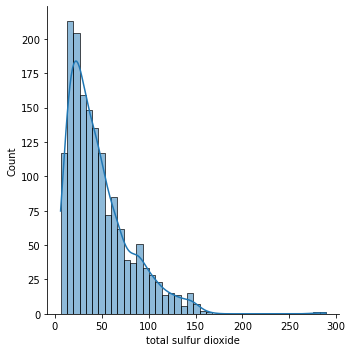

In [33]:
sns.displot(data=df,kde=True,x="total sulfur dioxide")
plt.show()

In [164]:
# The data of the column is not normalized. There is skewness present

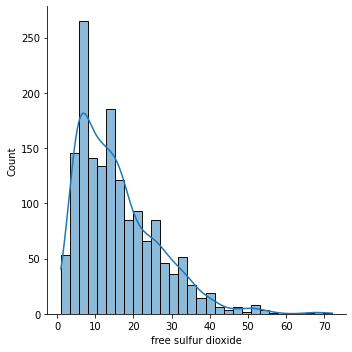

In [34]:
sns.displot(data=df,kde=True,x="free sulfur dioxide")
plt.show()

In [165]:
# The data of the column is not normalized. There is skewness present

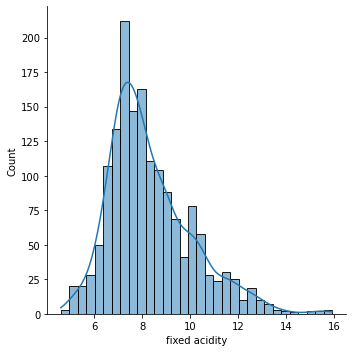

In [37]:
sns.displot(data=df,kde=True,x="fixed acidity")
plt.show()

In [ ]:
 # The data of the column is not normalized. There is slight skewness present

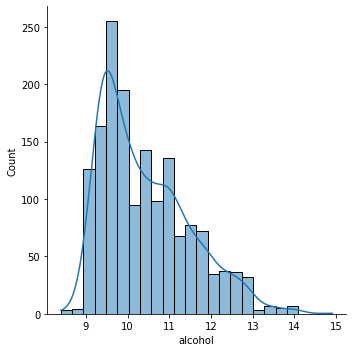

In [38]:
sns.displot(data=df,kde=True,x="alcohol")
plt.show()

In [ ]:
# The data of the column is not normalized. There is slight skewness present

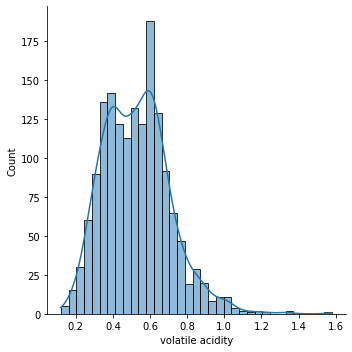

In [39]:
sns.displot(data=df,kde=True,x="volatile acidity")
plt.show()

In [166]:
# The data of the column is not normalized. There is skewness present

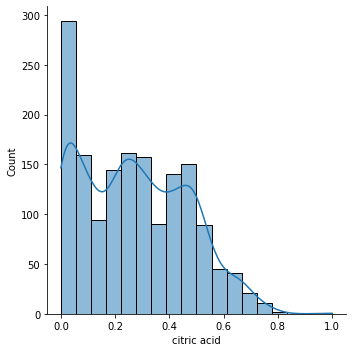

In [40]:
sns.displot(data=df,kde=True,x="citric acid")
plt.show()

In [167]:
#The data of the column is not normalized. There is skewness present

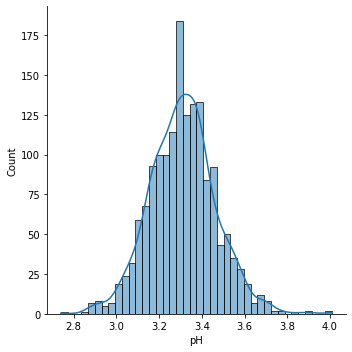

In [41]:
sns.displot(data=df,kde=True,x="pH")
plt.show()

In [168]:
#The data of the column is not normalized. There is skewness present

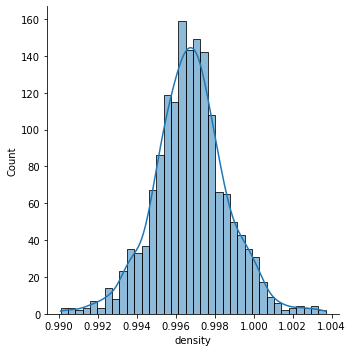

In [42]:
sns.displot(data=df,kde=True,x="density")
plt.show()

In [169]:
# The data of the column is not normalized. There is a slight skewness present

0    1382
1     217
Name: wine_quality, dtype: int64


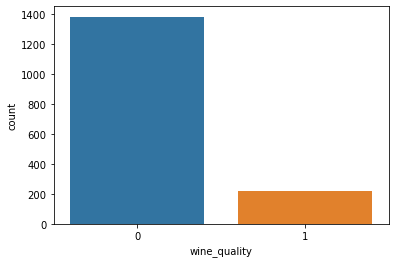

In [43]:
# Checking the count of categorical data

print(df["wine_quality"].value_counts())
sns.countplot(df["wine_quality"])
plt.show()

In [170]:
# Observations: Total no. of wine quality class 0 are 1382 and the totla no. of wine quality class 1 are 217. Classes are imbalance

# Checking coefficients of correlation (r)

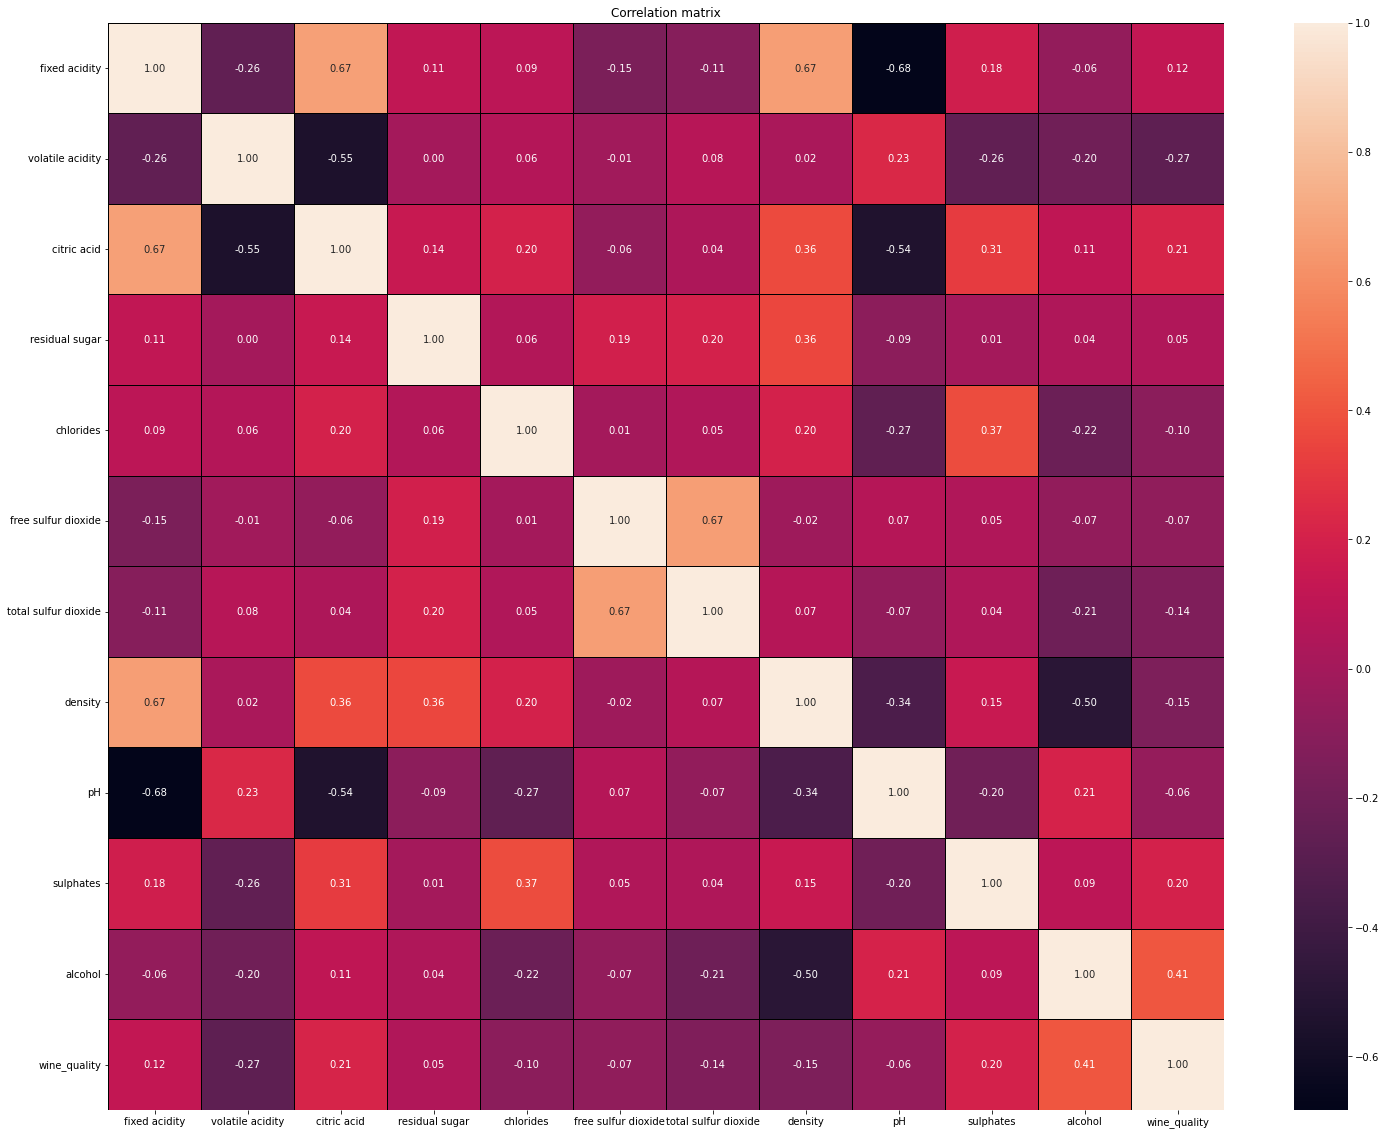

In [46]:
# Checking correlaiton coefficients to know the strength of relationship between variables
# Plotting heatmap
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.title("Correlation matrix")
plt.savefig('Correlation matrix.jpg')
plt.show()

In [48]:
# Arranging the relationship of target variable with other variables in descending order


corr_r["wine_quality"].sort_values(ascending=False)

wine_quality            1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: wine_quality, dtype: float64

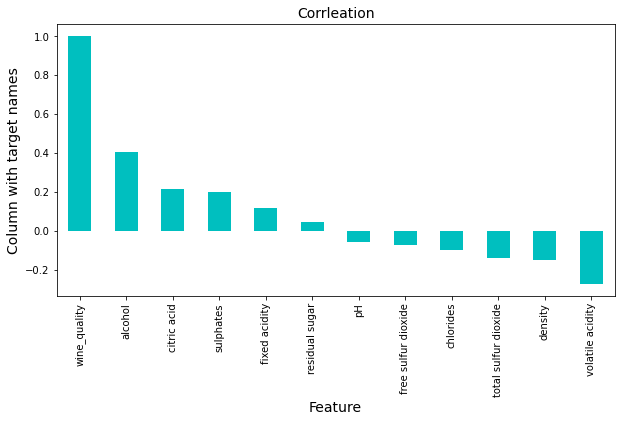

In [49]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(10,5))
corr_r["wine_quality"].sort_values(ascending=False).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Column with target names",fontsize=14)
plt.title("Corrleation",fontsize=14)
plt.show()

In [ ]:
#Observations: (Correlation of Target variable with features)
#1. "residual sugar" and "pH" have weak correlation with target variable "wine_quality"
#2. Max correlation: "alcohol" 
#3. Min correlation: "volatile acidity" Eventhough the columns "residual sugar" and "pH" have weak correlation, they are not dropped from the dataset as the dataset is small and dropping these columns will loose the information

# Pre-Processing

In [50]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_quality'],
      dtype='object')

In [51]:
# Splitting X data

x=df.drop("wine_quality",axis=1)

In [52]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [53]:
# Splitting y data

y=df["wine_quality"]

# Checking Outliers

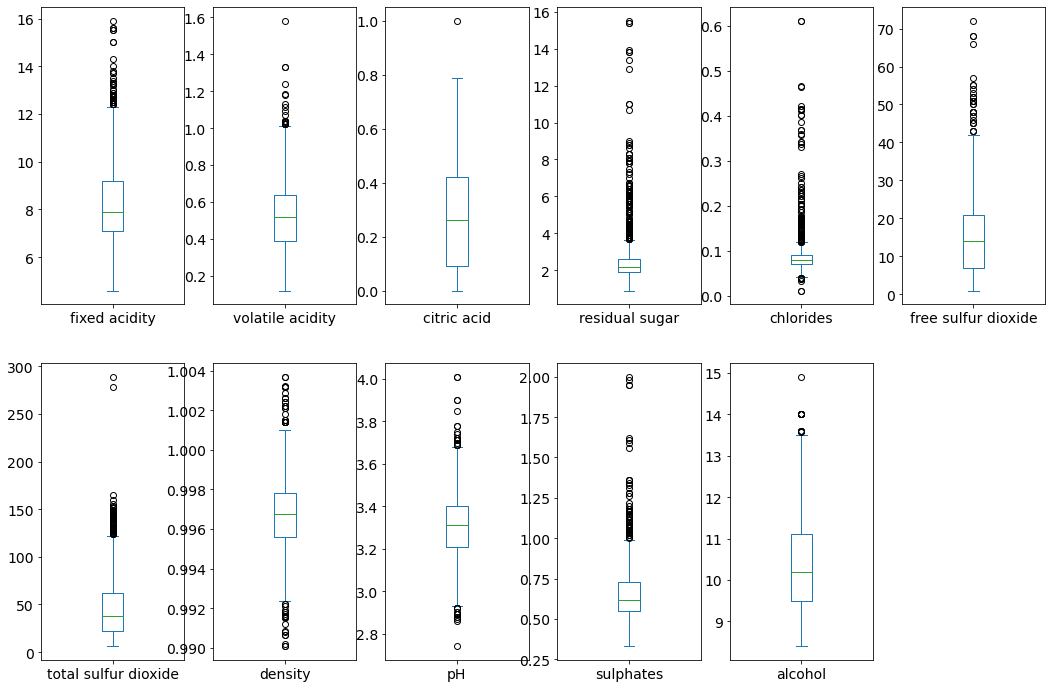

In [59]:
x.plot(kind="box",subplots=True,layout=(2,6),fontsize=14,figsize=(18,12))
plt.show()

In [171]:
#Observations:

#we can see a lot of outliers in the data. 
#Less Outliers: "citric acid" and "alcohol"

#More Outliers: "fixed acidity", "volatile acidity", "residual sugar", "chlorides", "free sulfur dioxide","total #sulfur dioxide", "density", "pH", "sulphates"

# Removing Outliers

In [60]:
# Calculating z score & identifying the rows and columns where absolute z score > 3
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [61]:
# Checking the absolute zscore < 3 for the x data before removing outliers

(np.abs(zscore(x))<3).all().all()

False

In [62]:
# Removing the rows in both x and y where the outliers are present in x features
x_new=x[(z<3).all(axis=1)]
y_new=y[(z<3).all(axis=1)]
x=x_new
y=y_new

In [63]:
x.shape

(1458, 11)

In [64]:
y.shape

(1458,)

In [65]:
# Data loss calculation
loss_percent=(1599-1458)/1599*100
loss_percent

8.818011257035648

In [172]:
#Observations: Data loss is less than 10% hence it is acceptable

# Transforming data to remove skewness

In [66]:
# Method 1: Using PowerTransformer

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_new_pt=pt.fit_transform(x)
x_1=pd.DataFrame(data=x_new_pt,columns=x.columns)
x_1.skew().sort_values(ascending=False)

alcohol                 0.108436
sulphates               0.021132
fixed acidity           0.019079
citric acid             0.018652
volatile acidity        0.005289
pH                     -0.000062
density                -0.000989
residual sugar         -0.003351
total sulfur dioxide   -0.005751
free sulfur dioxide    -0.021273
chlorides              -0.115179
dtype: float64

In [173]:
# Observations: Skewness range: (+0.115,-0.115)

In [67]:
# Method 2: Using powertransform
from sklearn.preprocessing import power_transform
x_new_pt=power_transform(x)
x_2=pd.DataFrame(data=x_new_pt,columns=x.columns)
x_2.skew().sort_values(ascending=False)


alcohol                 0.108436
sulphates               0.021132
fixed acidity           0.019079
citric acid             0.018652
volatile acidity        0.005289
pH                     -0.000062
density                -0.000989
residual sugar         -0.003351
total sulfur dioxide   -0.005751
free sulfur dioxide    -0.021273
chlorides              -0.115179
dtype: float64

In [174]:
#Observations: Skewness range: (+0.115,-0.115) Both powertransform and PowerTransformer gave same result and reduced the skeweness. 

#Did not try Boxcox and log methods as the columns contain negative numbers. 

#Did not check with additional methods as skewness resulted from these methods is small. 

#Hence, Considering this x transformed data for model training.

In [69]:
# Assigning x_1 to x

x=x_1

In [70]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.469102,1.045775,-1.521870,-0.610050,-0.145674,-0.238196,-0.063312,0.635233,1.359954,-0.588230,-1.112329
1,-0.172127,1.902404,-1.521870,0.648011,0.981105,1.092232,0.954919,0.056291,-0.818421,0.453527,-0.526854
2,-0.172127,1.344815,-1.242790,0.207208,0.714585,0.241177,0.626959,0.172545,-0.382868,0.221989,-0.526854
3,1.571351,-1.559116,1.441794,-0.610050,-0.207728,0.442705,0.786687,0.750325,-1.112726,-0.391548,-0.526854
4,-0.469102,1.045775,-1.521870,-0.610050,-0.145674,-0.238196,-0.063312,0.635233,1.359954,-0.588230,-1.112329
...,...,...,...,...,...,...,...,...,...,...,...
1453,-1.556059,0.513269,-0.977605,-0.374385,0.619516,1.530345,0.319096,-1.059841,0.951840,-0.391548,0.287108
1454,-1.886311,0.229325,-0.849852,0.031636,-1.120823,1.893947,0.540682,-0.929512,1.427375,0.994340,0.901833
1455,-1.451955,-0.007166,-0.663895,0.207208,-0.145674,1.353559,0.177040,-0.563765,0.745438,0.932248,0.742840
1456,-1.886311,0.758466,-0.725146,-0.374385,-0.207728,1.530345,0.319096,-0.722762,1.761962,0.668613,-0.033205


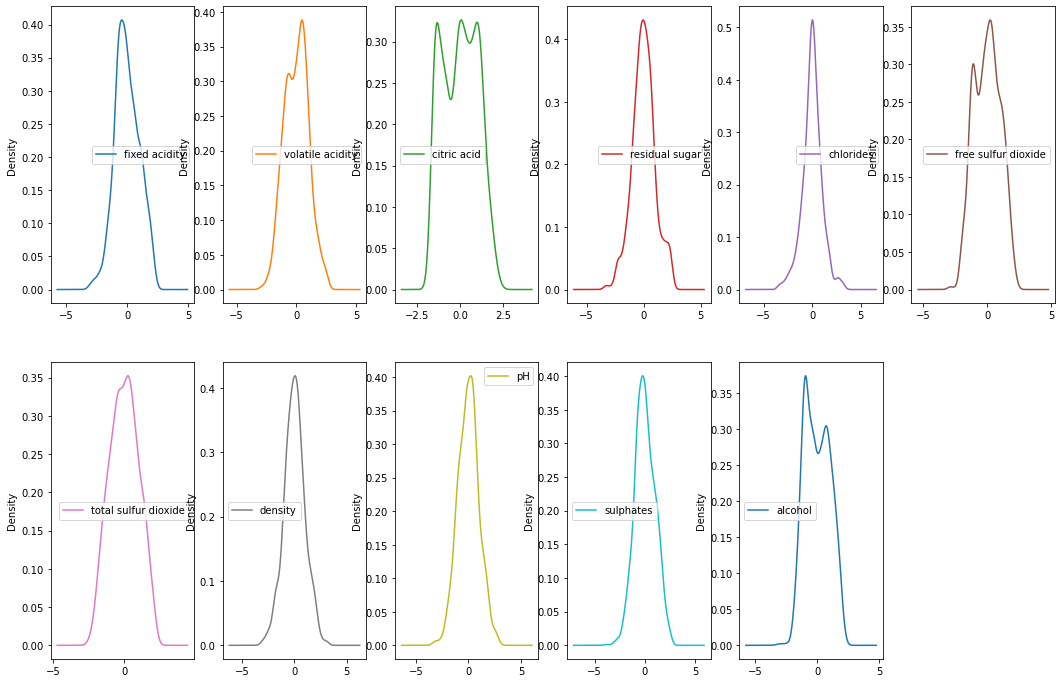

In [71]:
# Visually checking the distribution plots after skewness removal
x.plot(kind='density',subplots=True,layout=(2,6),sharex=False,legend=True,fontsize=10,figsize=(18,12))
plt.show()

# Scaling X data

In [72]:
# Applied standard scaler
# Here the standard scaler is applied eventhough skewness range is (+0.115,-0.115). 
#Ideally scaling is not be required as skewness is small. 
# However, scaling is applied to remove remaining small skewness and converting the data to the normally distributed data

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.46910218,  1.04577542, -1.52186997, ...,  1.35995444,
        -0.58823037, -1.11232895],
       [-0.17212704,  1.90240432, -1.52186997, ..., -0.81842137,
         0.45352708, -0.52685366],
       [-0.17212704,  1.34481498, -1.2427898 , ..., -0.38286787,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.00716591, -0.66389542, ...,  0.74543779,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.75846579, -0.7251456 , ...,  1.76196224,
         0.66861292, -0.03320546],
       [-1.77310975, -1.3354534 ,  1.0702808 , ...,  0.53744195,
         0.30109116,  0.7428399 ]])

# SMOTE for classfication

In [175]:
# As the target variable classes are imbalanced, using the random oversampling technique "SMOTE" for balancing the classes in target variable

In [73]:
# Checking the value count of target column
y.value_counts()

0    1257
1     201
Name: wine_quality, dtype: int64

In [74]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [75]:
# Checking the value count of target column
y.value_counts()

0    1257
1    1257
Name: wine_quality, dtype: int64

In [176]:
# Observations: Now classes are balanced in the target column

# Model Building

In [76]:
# As target variable has two classes, we will use binary classification model and starts with LogisticRegression

In [77]:
# Importing the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve


In [79]:
# Defining instance for logistic regression


lr=LogisticRegression()

In [85]:
# Finding the random state value where training accuracy = testing accuracy

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random State",i,"The model performs very well")
        print("At Random State:-",i)
        print("Training accuracy_score is:-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1))
        

At Random State 104 The model performs very well
At Random State:- 104
Training accuracy_score is:- 82.3
Testing accuracy_score is:- 82.3
At Random State 124 The model performs very well
At Random State:- 124
Training accuracy_score is:- 81.9
Testing accuracy_score is:- 81.9
At Random State 146 The model performs very well
At Random State:- 146
Training accuracy_score is:- 82.1
Testing accuracy_score is:- 82.1
At Random State 227 The model performs very well
At Random State:- 227
Training accuracy_score is:- 82.1
Testing accuracy_score is:- 82.1
At Random State 230 The model performs very well
At Random State:- 230
Training accuracy_score is:- 82.1
Testing accuracy_score is:- 82.1
At Random State 242 The model performs very well
At Random State:- 242
Training accuracy_score is:- 82.1
Testing accuracy_score is:- 82.1
At Random State 288 The model performs very well
At Random State:- 288
Training accuracy_score is:- 82.1
Testing accuracy_score is:- 82.1
At Random State 365 The model perf

In [177]:
# Observations: As multple random states give same training and testing accuarcy scores, selected random state: 832

In [99]:
# Using the random state: 832 and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=832)

# Logistic Regression

In [100]:
 lr.fit(x_train,y_train)

LogisticRegression()

In [101]:
 pred_train=lr.predict(x_train)

In [102]:
pred_test=lr.predict(x_test)

In [103]:
accuracy_score(y_train,pred_train)

0.8229736449527598

In [104]:
accuracy_score(y_test,pred_test)

0.8230616302186878

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       254
           1       0.81      0.83      0.82       249

    accuracy                           0.82       503
   macro avg       0.82      0.82      0.82       503
weighted avg       0.82      0.82      0.82       503



# Cross Validation score for logistic regression¶

In [117]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score
for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print(" At CV:",j)
    print("Cross validation score is:",lsc*100)
    print("Model_accuracy_score is:",lss*100)
    print("Difference b/w Cross validation score and Model accuracy score is",lsc-lss)
    print("\n")        

 At CV: 2
Cross validation score is: 77.28719172633254
Model_accuracy_score is: 82.30616302186878
Difference b/w Cross validation score and Model accuracy score is -0.05018971295536245


 At CV: 3
Cross validation score is: 80.23070803500399
Model_accuracy_score is: 82.30616302186878
Difference b/w Cross validation score and Model accuracy score is -0.020754549868647998


 At CV: 4
Cross validation score is: 80.26623241825564
Model_accuracy_score is: 82.30616302186878
Difference b/w Cross validation score and Model accuracy score is -0.02039930603613138


 At CV: 5
Cross validation score is: 80.15041226743126
Model_accuracy_score is: 82.30616302186878
Difference b/w Cross validation score and Model accuracy score is -0.021557507544375132


 At CV: 6
Cross validation score is: 80.1909307875895
Model_accuracy_score is: 82.30616302186878
Difference b/w Cross validation score and Model accuracy score is -0.021152322342792962


 At CV: 7
Cross validation score is: 80.46591059822258
Model_ac

In [178]:
#Observations: At CV=9, Difference b/w Cross validation score and Model accuracy score is less hence selected CV=9

In [118]:
# Using fixed CV=9 and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,x,y,cv=9).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV score is: 80.78341013824884 
The accuracy score is: 82.30616302186878
Difference is: 0.015227528836199378


# Checking and comparing other classifiers

In [119]:
# Checking accuracy with Naive Bayes classifier - Gaussian NB
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7912524850894632
[[206  48]
 [ 57 192]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       254
           1       0.80      0.77      0.79       249

    accuracy                           0.79       503
   macro avg       0.79      0.79      0.79       503
weighted avg       0.79      0.79      0.79       503



In [120]:
score=cross_val_score(gnb,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predgnb)*100)
print("Difference is:",accuracy_score(y_test,predgnb)-score)

The CV score is: 78.99456676338397 
The accuracy score is: 79.12524850894633
Difference is: 0.0013068174556235546


In [121]:
# Checking accuracy with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8986083499005965
[[228  26]
 [ 25 224]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       254
           1       0.90      0.90      0.90       249

    accuracy                           0.90       503
   macro avg       0.90      0.90      0.90       503
weighted avg       0.90      0.90      0.90       503



In [122]:
score=cross_val_score(dtc,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,preddtc)*100)
print("Difference is:",accuracy_score(y_test,preddtc)-score)

The CV score is: 88.38396768504295 
The accuracy score is: 89.86083499005964
Difference is: 0.014768673050166936


In [123]:
# Checking accuracy with KNearestNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knnc=KNeighborsClassifier()
knnc.fit(x_train,y_train)
predknnc=knnc.predict(x_test)
print(accuracy_score(y_test,predknnc))
print(confusion_matrix(y_test,predknnc))
print(classification_report(y_test,predknnc))

0.9005964214711729
[[205  49]
 [  1 248]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.89       254
           1       0.84      1.00      0.91       249

    accuracy                           0.90       503
   macro avg       0.92      0.90      0.90       503
weighted avg       0.92      0.90      0.90       503



In [124]:
score=cross_val_score(knnc,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predknnc)*100)
print("Difference is:",accuracy_score(y_test,predknnc)-score)

The CV score is: 86.07498435455425 
The accuracy score is: 90.05964214711729
Difference is: 0.0398465779256304


In [125]:
# Checking accuracy with Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier()
sgdc.fit(x_train,y_train)
predsgdc=sgdc.predict(x_test)
print(accuracy_score(y_test,predsgdc))
print(confusion_matrix(y_test,predsgdc))
print(classification_report(y_test,predsgdc))

0.8349900596421471
[[212  42]
 [ 41 208]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       254
           1       0.83      0.84      0.83       249

    accuracy                           0.83       503
   macro avg       0.83      0.83      0.83       503
weighted avg       0.84      0.83      0.83       503



In [126]:
score=cross_val_score(sgdc,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predsgdc)*100)
print("Difference is:",accuracy_score(y_test,predsgdc)-score)

The CV score is: 78.12197758434318 
The accuracy score is: 83.49900596421472
Difference is: 0.05377028379871529


In [127]:
# Checking accuracy with SVC classifier
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
predsvc=sv.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8986083499005965
[[219  35]
 [ 16 233]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       254
           1       0.87      0.94      0.90       249

    accuracy                           0.90       503
   macro avg       0.90      0.90      0.90       503
weighted avg       0.90      0.90      0.90       503



In [128]:
score=cross_val_score(sv,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predsvc)*100)
print("Difference is:",accuracy_score(y_test,predsvc)-score)

The CV score is: 87.46771348921887 
The accuracy score is: 89.86083499005964
Difference is: 0.02393121500840778


#  Checking with Ensembling Techniques

In [129]:
# Checking accuracy with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9403578528827038
[[240  14]
 [ 16 233]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       254
           1       0.94      0.94      0.94       249

    accuracy                           0.94       503
   macro avg       0.94      0.94      0.94       503
weighted avg       0.94      0.94      0.94       503



In [130]:
score=cross_val_score(RFC,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predRFC)*100)
print("Difference is:",accuracy_score(y_test,predRFC)-score)

The CV score is: 93.39591511634524 
The accuracy score is: 94.03578528827038
Difference is: 0.006398701719251498


In [131]:
# Checking accuracy with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9602385685884692
[[240  14]
 [  6 243]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       254
           1       0.95      0.98      0.96       249

    accuracy                           0.96       503
   macro avg       0.96      0.96      0.96       503
weighted avg       0.96      0.96      0.96       503



In [132]:
score=cross_val_score(ET,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predET)*100)
print("Difference is:",accuracy_score(y_test,predET)-score)

The CV score is: 94.74853501735221 
The accuracy score is: 96.02385685884693
Difference is: 0.012753218414947143


In [133]:
# Checking accuracy with Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8966202783300199
[[222  32]
 [ 20 229]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       254
           1       0.88      0.92      0.90       249

    accuracy                           0.90       503
   macro avg       0.90      0.90      0.90       503
weighted avg       0.90      0.90      0.90       503



In [134]:
score=cross_val_score(GB,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predGB)*100)
print("Difference is:",accuracy_score(y_test,predGB)-score)

The CV score is: 88.18541275530524 
The accuracy score is: 89.66202783300199
Difference is: 0.014766150776967524


In [135]:
# Checking accuracy with Ada Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.878727634194831
[[220  34]
 [ 27 222]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       254
           1       0.87      0.89      0.88       249

    accuracy                           0.88       503
   macro avg       0.88      0.88      0.88       503
weighted avg       0.88      0.88      0.88       503



In [136]:
score=cross_val_score(ABC,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predABC)*100)
print("Difference is:",accuracy_score(y_test,predABC)-score)

The CV score is: 84.0483302042442 
The accuracy score is: 87.8727634194831
Difference is: 0.03824433215238909


In [137]:
# Checking accuracy with XG Boost Classifier
from xgboost import XGBClassifier
XGBC=XGBClassifier()
XGBC.fit(x_train,y_train)
predXGBC=XGBC.predict(x_test)
print(accuracy_score(y_test,predXGBC))
print(confusion_matrix(y_test,predXGBC))
print(classification_report(y_test,predXGBC))

0.9443339960238568
[[236  18]
 [ 10 239]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       254
           1       0.93      0.96      0.94       249

    accuracy                           0.94       503
   macro avg       0.94      0.94      0.94       503
weighted avg       0.94      0.94      0.94       503



In [138]:
score=cross_val_score(XGBC,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,predXGBC)*100)
print("Difference is:",accuracy_score(y_test,predXGBC)-score)

The CV score is: 92.52133469875406 
The accuracy score is: 94.43339960238568
Difference is: 0.019120649036316273


In [179]:
#Observations: Out of all algorithms checked, ExtraTreesClassifier is selected for hyper parameter tuning as the difference between model and cross-validation score is less.

#Hence we are going to pick ExtraTreesClassifier Model.

#Below we will do the hyper parameter tuning for ExtraTreesClassifier Model to see if we can increase the score.

# Hyper Parameter Tunning

In [139]:
# Hyper parameter tuning on Extra Trees Classifier

from sklearn.model_selection import GridSearchCV

    
    

In [140]:
# Defining parameters for Extra Trees Classifier
parameters={'criterion':['gini','entropy'],
           'random_state':[10,50,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}

In [141]:
# Defining instance for GridSearchCV

GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [142]:
# Apply GridSearchCV to train the model with all combination of parameters
    
GCV.fit(x_train,y_train)
    

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [143]:
# printing the best parameters

GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [147]:
# Training the model using best parameters from GridSearchCV and checking the accuracy score, classificaiton report and confusion matrix
Final_model=ExtraTreesClassifier(criterion='gini',max_depth=20,n_estimators=200, n_jobs=-2,random_state=1000)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

96.02385685884693
[[237  17]
 [  3 246]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       254
           1       0.94      0.99      0.96       249

    accuracy                           0.96       503
   macro avg       0.96      0.96      0.96       503
weighted avg       0.96      0.96      0.96       503



In [145]:
score=cross_val_score(Final_model,x,y,cv=9).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print("Difference is:",accuracy_score(y_test,pred)-score)

The CV score is: 94.31117369289413 
The accuracy score is: 96.02385685884693
Difference is: 0.017126831659527997


In [180]:
#Observation: Not much difference in scrore after hyper parameter tunning. Since we are getting a good score we will continue with this model

# AUC ROC Curve

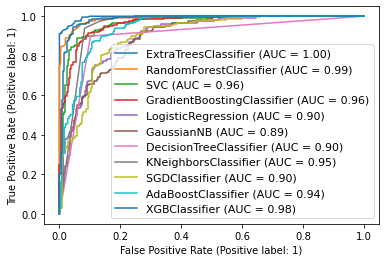

In [150]:
# Checking AUC ROC Curve to compare the performance among multiple models

from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

# Initially Plotting the AUC ROC curve for Extra Tree Classifier

disp=plot_roc_curve(ET,x_test,y_test) 

# Basically plot_roc_curve function plot the roc_curve for the classifier. Here we store the first gragh in the variable "disp"
# and access its axis and provide to the next plot_roc_curve function, so that the plot appear of the axes of the first graph only
# If we dont specify "ax", it will plot multiple graphs

# Plotting the AUC ROC curve for remaining models with same axis of Extra Tree Classifier

plot_roc_curve(RFC,x_test,y_test,ax=disp.ax_)   

plot_roc_curve(sv,x_test,y_test,ax=disp.ax_)
plot_roc_curve(GB,x_test,y_test,ax=disp.ax_)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gnb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knnc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(sgdc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ABC,x_test,y_test,ax=disp.ax_)
plot_roc_curve(XGBC,x_test,y_test,ax=disp.ax_)


plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [181]:
#Observations: Most of models are performing well. ExtraTreesClassifier is the best one among all models from this plot. Also it is the best based on the accuracy score and the least difference between model accuracy score & cross validation score. Hence saving ExtraTreesClassifier as the final model for deployment



# Model Saving

In [151]:
# saving the ExtraTreesClassifier model

import pickle
filename='red_wine_quality_prediction.pkl'
pickle.dump(ET, open(filename,'wb'))

# Conclusion

In [152]:
import numpy as np
a=np.array(y_test)
predicted=np.array(ET.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
498,1,1
499,1,1
500,0,0
501,0,0


In [182]:
#Additional Notes:

#1) As the dataset is small with 11 no. of x columns, multi collinearity is not checked and didn't apply VIF to remove  Multi collinearity as this will lead to data loss
#2) Did not use PCA as the dataset is small